In [2]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

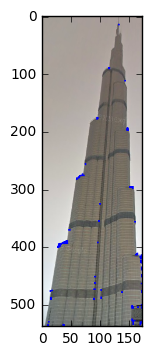

In [3]:
img = cv2.imread('/home/taras/Pictures/khalifa1.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#plt.imshow(gray)
#plt.show()

dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)

img[dst>0.01*dst.max()]=[0,0,255]

plt.imshow(img)
plt.show()

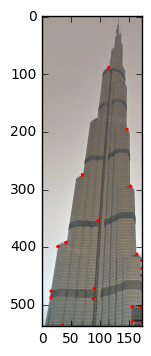

(<matplotlib.image.AxesImage at 0x7f701d55dfd0>, None)

In [120]:
img = cv2.imread('/home/taras/Pictures/khalifa1.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,20,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()

In [5]:
def resize(image, newsize):
    return cv2.resize(image,(newsize[1], newsize[0]), interpolation = cv2.INTER_CUBIC)

In [7]:
def draw_line(img, lines, color=[255, 0, 0], thickness=10): 
    for x1,y1,x2,y2 in line:
        cv2.line(img, (x1, y1), (x2, y2), color, thickness)

In [111]:
color_pattern = cv2.imread('/home/taras/Pictures/khalifa1.png')
pattern =  cv2.cvtColor(color_pattern, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(pattern,None)
print pattern.shape

(538, 173)


In [112]:
color_image = cv2.imread('/home/taras/Pictures/khalifa5.png') 
image =  cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
image = resize(image, (image.shape[0] / 2, image.shape[1]/2 ))

(538, 189)


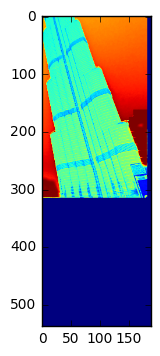

In [113]:
h_offset = abs(pattern.shape[0] - image.shape[0])
w_offset = abs(pattern.shape[1] - image.shape[1]) 

image= cv2.copyMakeBorder(image,0,h_offset,0,w_offset,cv2.BORDER_CONSTANT,value=[0,0,0])

print image.shape

plt.imshow(image)
plt.show()

In [114]:
kp2, des2 = orb.detectAndCompute(image,None)

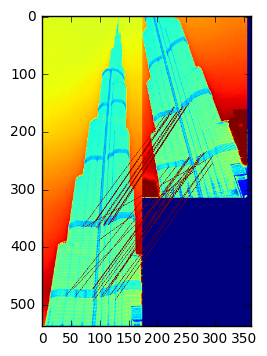

In [118]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
matches = matches[:30]

list_kp1 = [kp1[mat.queryIdx].pt for mat in matches] 
list_kp2 = [kp2[mat.trainIdx].pt for mat in matches]

result = np.hstack((pattern,image))

for qpt, tpt in zip(list_kp1, list_kp2):
    x,y = int(qpt[0]), int(qpt[1])
    cv2.line(result, (x, y), (int(tpt[0] + img1.shape[1]), int(tpt[1])), [255, 0, 0], 1)

plt.imshow(result)
plt.show()

found matches =  222 [<DMatch 0x7f706ce09c90>, <DMatch 0x7f706ce09990>]


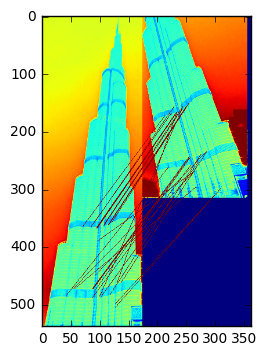

In [116]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)
print "found matches = ", len(matches), matches[0]
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in xrange(len(matches))]

# ratio test as per Lowe's paper
good_matches = []
for match in matches:
    if len(match) > 1:
        m,n = match[0], match[1] 
        if m.distance < 0.7*n.distance:
        #matchesMask[i]=[1,0]
            good_matches.append(m)
        
list_kp1 = [kp1[mat.queryIdx].pt for mat in good_matches] 
list_kp2 = [kp2[mat.trainIdx].pt for mat in good_matches]

result = np.hstack((pattern,image))

for qpt, tpt in zip(list_kp1, list_kp2):
    x,y = int(qpt[0]), int(qpt[1])
    cv2.line(result, (x, y), (int(tpt[0] + img1.shape[1]), int(tpt[1])), [255, 0, 0], 1)

plt.imshow(result)
plt.show()

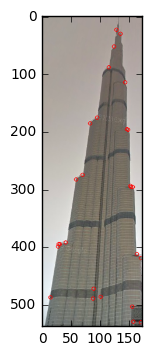

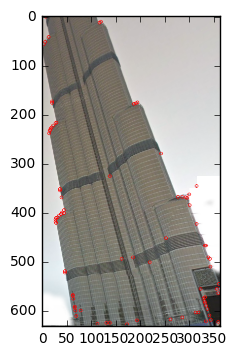

In [131]:
test   = cv2.imread('/home/taras/Pictures/khalifa1.png')

fast = cv2.FastFeatureDetector_create(40)

kp = fast.detect(test,None)
test = cv2.drawKeypoints(test, kp, None, color=(255,0,0))

plt.imshow(test)
plt.show()

target = cv2.imread('/home/taras/Pictures/khalifa5.png')
kp2 = fast.detect(target,None)
target = cv2.drawKeypoints(target, kp2, None, color=(255,0,0))

plt.imshow(target)
plt.show()

In [129]:
cv2.drawMatchesKnn.__doc__

'drawMatchesKnn(img1, keypoints1, img2, keypoints2, matches1to2, outImg[, matchColor[, singlePointColor[, matchesMask[, flags]]]]) -> outImg'